# C

$f(x) = \frac{1}{1+x^2},x\in [-5,5]\\
g(t) = \frac{1}{1+(t-6)^2},x\in [1,11]\\
N = 11$

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def g(x):
    return 1/(1+(x-6)**2)

def dg(x):
    return -2*(x-6)/((1+(x-6)**2)**2)

In [17]:
#generate points for S32spline
N = 11
ti = np.linspace(1, 11, N)
txt = open("output/C_B32.txt",'w')
txt.write(str(N)+"\n")
#f(1)~f(11)
for i in range(0,N):
        txt.write(str(ti[i])+" "+str(g(ti[i]))+"\n")
txt.write("\n")
#f'(1) and f'(11)
txt.write(str(dg(ti[0]))+" "+str(dg(ti[N-1]))+"\n")
txt.close()

#generate points for S21spline
ti = np.linspace(1.5, 10.5, N-1)
txt = open("output/C_B21.txt",'w')
txt.write(str(N)+"\n")
#f(1.5)~f(10.5)
for i in range(N-1):
    txt.write(str(ti[i])+" "+str(g(ti[i]))+"\n")
txt.write("\n")
#f(1) and f(11)
txt.write(str(g(1))+" "+str(g(11))+"\n")
txt.close()


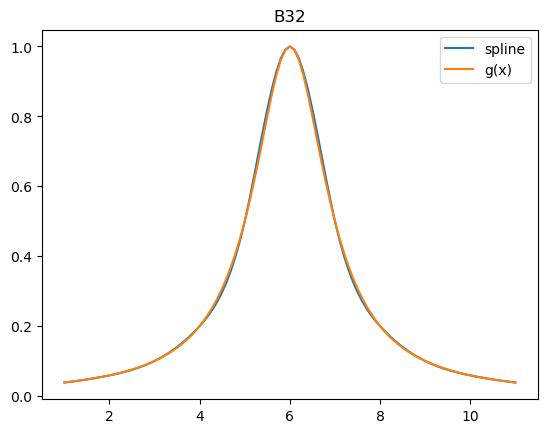

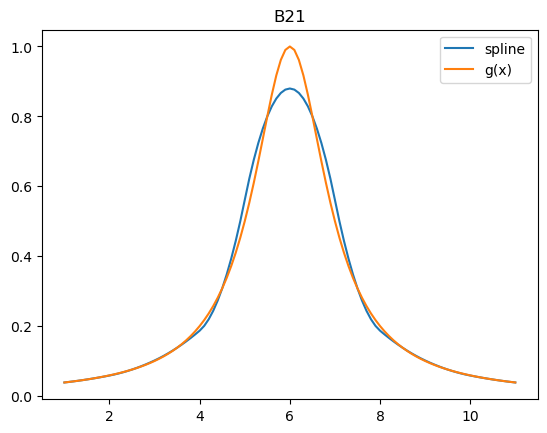

In [18]:
# plot B32
txt = open("output/D1B32_evals_11.txt",'r')
n = txt.readline().split()[0]
n = int(n)
data = np.zeros((n,2))
for i in range(n):
    data[i] = txt.readline().split()
y = g(data[:,0])
txt.close()

plt.figure(1)
plt.plot(data[:,0],data[:,1],data[:,0],y)
plt.title("B32")
plt.legend(["spline","g(x)"])
plt.show()

# plot B21
txt = open("output/B21_evals_11.txt",'r')
n = txt.readline().split()[0]
n = int(n)
data = np.zeros((n,2))
for i in range(n):
    data[i] = txt.readline().split()
y = g(data[:,0])
txt.close()

plt.figure(2)
plt.plot(data[:,0],data[:,1],data[:,0],y)
plt.title("B21")
plt.legend(["spline","g(x)"])
plt.show()

# D
$ E_S(x)$ at $x=-3.5,-3,-0.5,0,0.5,3,3.5$

as you can see from the figure below, B32 is more accurate especially around 0.

The reason B21's errors at -3.5, -0.5, 0.5, 3.5 approaches machine precision 
and B32's errors at -3, 0, 3 approaches machine precision
is that mathematically splines is designed to equal to the function's value at those points.

In [28]:
# for S32
txt = open("output/D1B32_evals_11.txt",'r')
n = txt.readline().split()[0]
n = int(n)
data = np.zeros((n,2))
for i in range(n):
    data[i] = txt.readline().split()
txt.close()

x = np.array([-3.5,-3,-0.5,0,0.5,3,3.5])
x += 6
y = g(x)
index = np.zeros(7)
for i in range(7):
    index[i] = np.argwhere(data[:,0]==x[i])[0]
index = index.astype(int)
error_B32 = np.zeros(7)
for i in range(7):
    error_B32[i] = np.abs(data[index[i],1]-y[i])
print("S32 error:")
print(error_B32)

S32 error:
[0.0006696 0.        0.020529  0.        0.020529  0.        0.0006696]


S21 error:
[1.88679246e-09 1.41800000e-03 0.00000000e+00 1.20238000e-01
 0.00000000e+00 1.41800000e-03 1.88679246e-09]


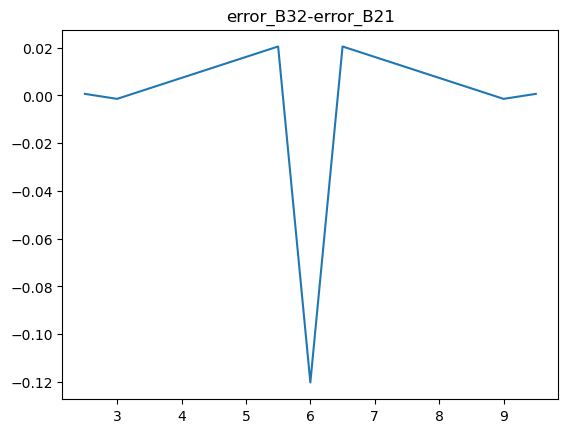

In [31]:
# for S21
txt = open("output/B21_evals_11.txt",'r')
n = txt.readline().split()[0]
n = int(n)
data = np.zeros((n,2))
for i in range(n):
    data[i] = txt.readline().split()
txt.close()

index = np.zeros(7)
for i in range(7):
    index[i] = np.argwhere(data[:,0]==x[i])[0]
index = index.astype(int)
error_B21 = np.zeros(7)
for i in range(7):
    error_B21[i] = np.abs(data[index[i],1]-y[i])
print("S21 error:")
print(error_B21)

# plot error
plt.figure(3)
plt.plot(x,error_B32-error_B21)
plt.title("error_B32-error_B21")
plt.show()